In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('data/서폿.csv')
df.drop('Unnamed: 0',1,inplace=True)
df.head(2)

C:\Users\ice_9\AppData\Local\Temp\ipykernel_5360\1419868567.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop('Unnamed: 0',1,inplace=True)


,win,분당 킬,분당 어시,분당 데스,퍼블유무,퍼블어시유무,분당 얻은 골드,분당 피해량,분당 cc건시간,분당 CS,분당 죽은시간,분당 시야점수
0,True,0.04,0.87,0.04,True,False,299.93,287.65,0.65,1.0,0.76,2.46
1,False,0.11,0.18,0.25,False,False,268.75,518.54,1.01,1.0,7.17,0.65


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(df.drop('win',1),df['win'], random_state=0)

scaler = MinMaxScaler()
scaler.fit(X_train)  #train꺼로 transform한걸로 fit 중요!!!!
X_train_temp = scaler.transform(X_train)
X_test_temp = scaler.transform(X_test)
X_train = pd.DataFrame(X_train_temp, columns=X_train.columns, index=list(X_train.index.values))
X_test = pd.DataFrame(X_test_temp, columns=X_test.columns, index=list(X_test.index.values))

C:\Users\ice_9\AppData\Local\Temp\ipykernel_5360\2179540545.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train, X_test, y_train, y_test = train_test_split(df.drop('win',1),df['win'], random_state=0)


1.0 0.741
0.874 0.744
0.877 0.768
0.851 0.767
0.852 0.781
0.843 0.777
0.844 0.782
0.837 0.787
0.838 0.789
0.877 0.768


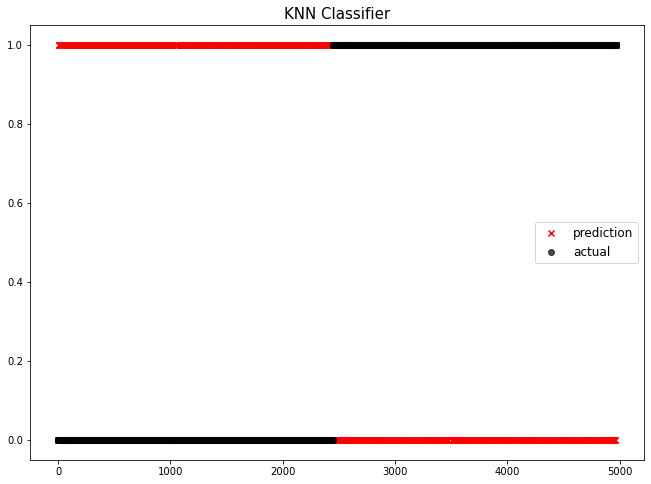

            model        f1
0  KNN Classifier  0.771457


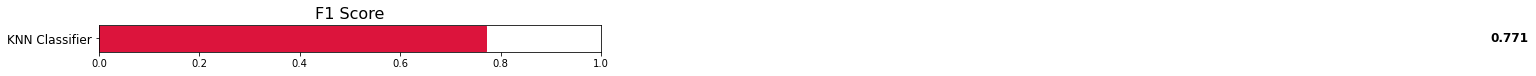

In [3]:
### 모델링 (random_state=0)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score

my_predictions = {}
my_pred = None
my_actual = None
my_name = None

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(11, 8))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def f1_eval(name_, pred, actual):
    global my_predictions, colors, my_pred, my_actual, my_name
    
    my_name = name_
    my_pred = pred
    my_actual = actual

    plot_predictions(name_, pred, actual)

    f1 = f1_score(actual, pred)
    my_predictions[name_] = f1

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'f1'])
    print(df)
    min_ = 0
    max_ = 1
    
    length = len(df) / 2
    
    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['f1'], height=0.3)
    
    for i, v in enumerate(df['f1']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('F1 Score', fontsize=16)
    plt.xlim(min_, max_)
    
    plt.show()
    
def add_model(name_, pred, actual):
    global my_predictions, my_pred, my_actual, my_name
    my_name = name_
    my_pred = pred
    my_actual = actual
    
    f1 = f1_score(actual, pred)
    my_predictions[name_] = f1

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

def plot_all():
    global my_predictions, my_pred, my_actual, my_name
    
    plot_predictions(my_name, my_pred, my_actual)
    
    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'f1'])
    print(df)
    min_ = 0
    max_ = 1
    
    length = len(df) / 2
    
    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['f1'], height=0.3)
    
    for i, v in enumerate(df['f1']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('F1 Score', fontsize=16)
    plt.xlim(min_, max_)
    
    plt.show()
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
#### knn 파라미터 찾기
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    print(knn.score(X_train, y_train).round(3), knn.score(X_test, y_test).round(3))
    # f1_eval(f'KNN Classifier {i}', pred, y_test)
#### 머신러닝 모델 돌려보기
#### hyperparameter 튜닝 전
# KNN classifier (K=3)
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(knn.score(X_train, y_train).round(3), knn.score(X_test, y_test).round(3))
f1_eval('KNN Classifier', pred, y_test)

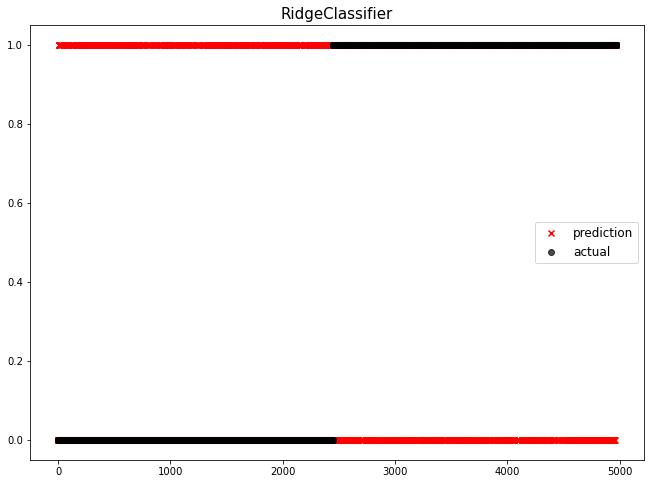

             model        f1
0  RidgeClassifier  0.818072
1   KNN Classifier  0.771457


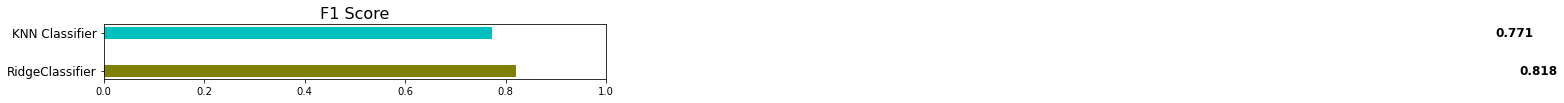

In [4]:
# RidgeCalssifier (alpha=1)
from sklearn.linear_model import RidgeClassifier

ridge = RidgeClassifier(alpha=1)
ridge.fit(X_train, y_train)
pred = ridge.predict(X_test)
f1_eval('RidgeClassifier', pred, y_test)

0.821 0.817


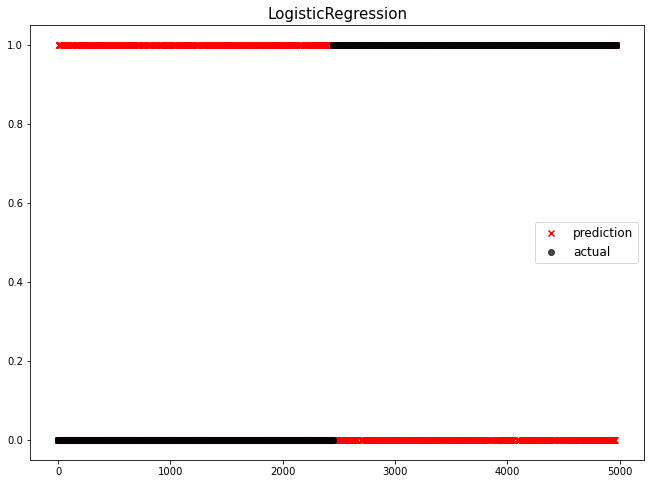

                model        f1
0  LogisticRegression  0.819392
1     RidgeClassifier  0.818072
2      KNN Classifier  0.771457


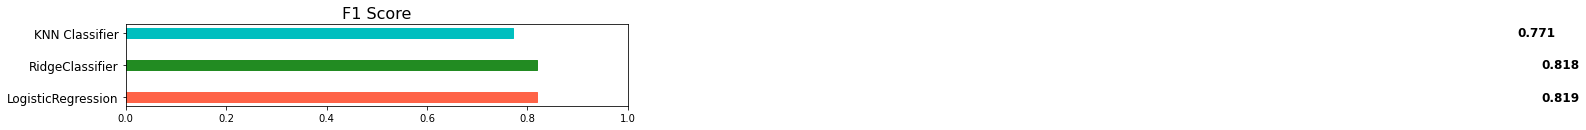

In [5]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression(random_state=0)
lg.fit(X_train, y_train)
pred = lg.predict(X_test)
print(lg.score(X_train, y_train).round(3), lg.score(X_test, y_test).round(3))
f1_eval('LogisticRegression', pred, y_test)

0.808 0.795


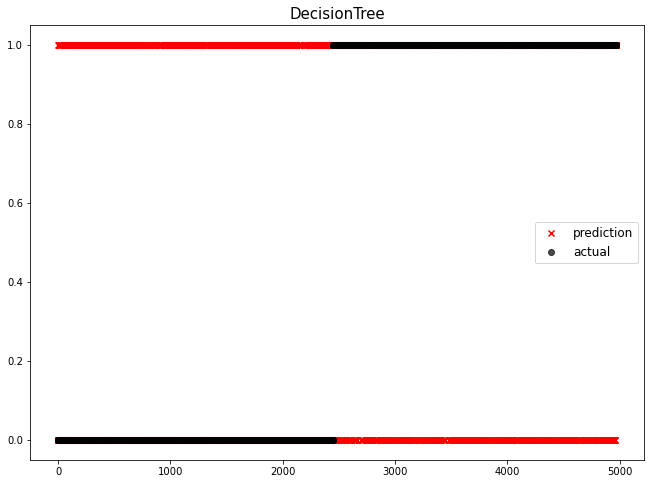

                model        f1
0  LogisticRegression  0.819392
1     RidgeClassifier  0.818072
2        DecisionTree  0.802863
3      KNN Classifier  0.771457


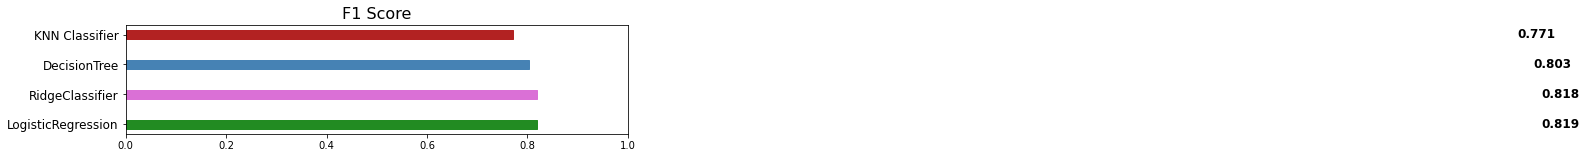

In [6]:
# DecisionTree (max_depth = 5, max_features=0.8)
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0,max_depth = 5, max_features=0.8)
tree.fit(X_train, y_train)
pred = tree.predict(X_test)
print(tree.score(X_train, y_train).round(3), tree.score(X_test, y_test).round(3))
f1_eval('DecisionTree', pred, y_test)

0.825 0.816


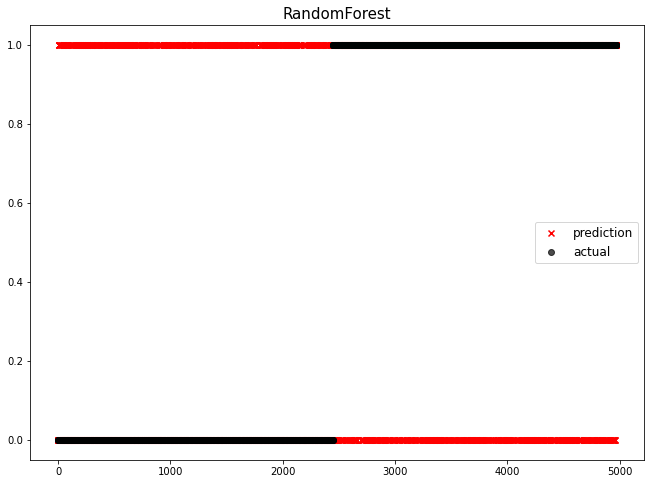

                model        f1
0        RandomForest  0.819491
1  LogisticRegression  0.819392
2     RidgeClassifier  0.818072
3        DecisionTree  0.802863
4      KNN Classifier  0.771457


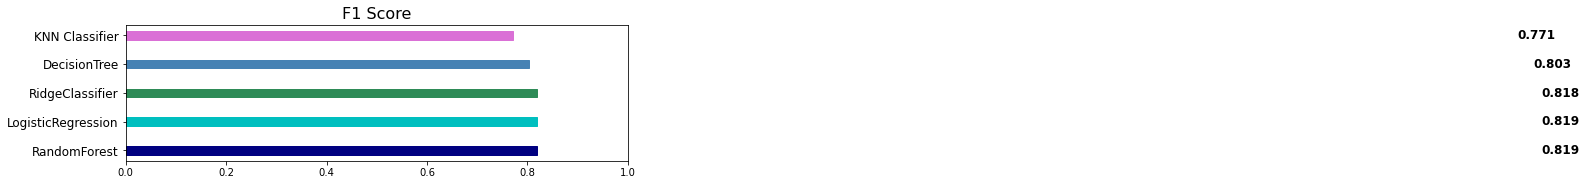

In [7]:
#RF (max_depth = 5)
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state = 0, max_depth = 5)
forest.fit(X_train, y_train)
pred = forest.predict(X_test)
print(forest.score(X_train, y_train).round(3), forest.score(X_test, y_test).round(3))
f1_eval('RandomForest', pred, y_test)

0.93 0.815


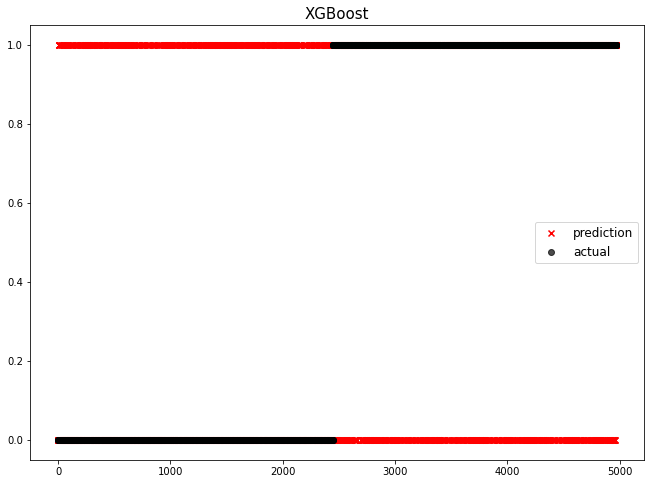

                model        f1
0        RandomForest  0.819491
1  LogisticRegression  0.819392
2     RidgeClassifier  0.818072
3             XGBoost  0.817822
4        DecisionTree  0.802863
5      KNN Classifier  0.771457


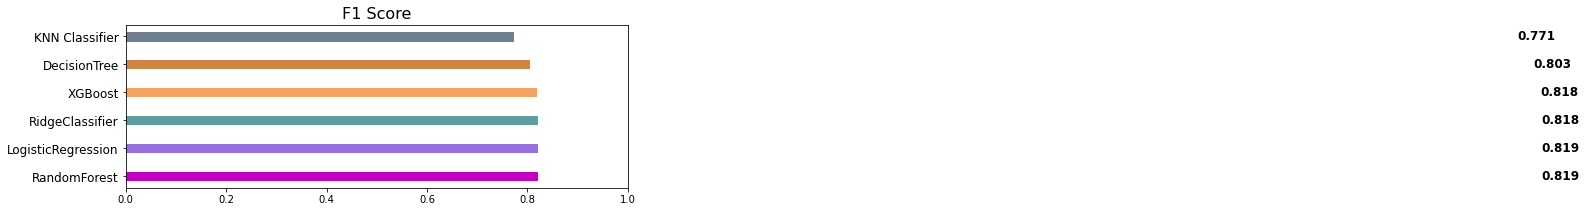

In [8]:
# XGBoost
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state = 0)
xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)
print(xgb.score(X_train, y_train).round(3), xgb.score(X_test, y_test).round(3))
f1_eval('XGBoost', pred, y_test)

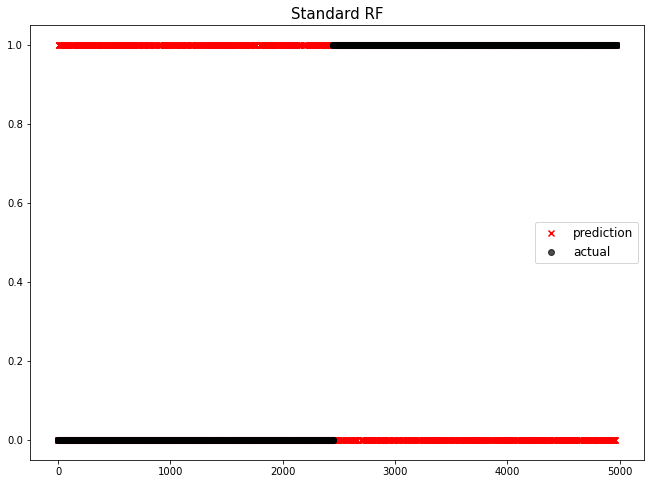

                model        f1
0        RandomForest  0.819491
1         Standard RF  0.819491
2  LogisticRegression  0.819392
3     RidgeClassifier  0.818072
4             XGBoost  0.817822
5        DecisionTree  0.802863
6      KNN Classifier  0.771457


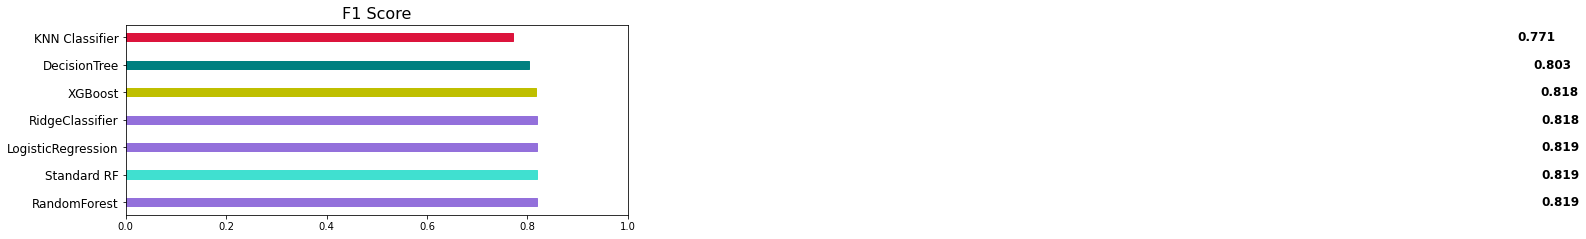

In [9]:
RF_pipeline = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(random_state = 0, max_depth = 5)
)
RF_pipeline.fit(X_train, y_train)
pred = RF_pipeline.predict(X_test)
f1_eval('Standard RF', pred, y_test)

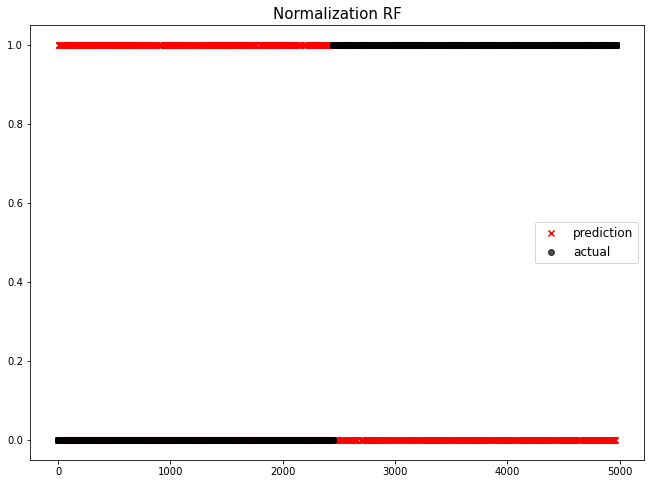

                model        f1
0        RandomForest  0.819491
1         Standard RF  0.819491
2    Normalization RF  0.819491
3  LogisticRegression  0.819392
4     RidgeClassifier  0.818072
5             XGBoost  0.817822
6        DecisionTree  0.802863
7      KNN Classifier  0.771457


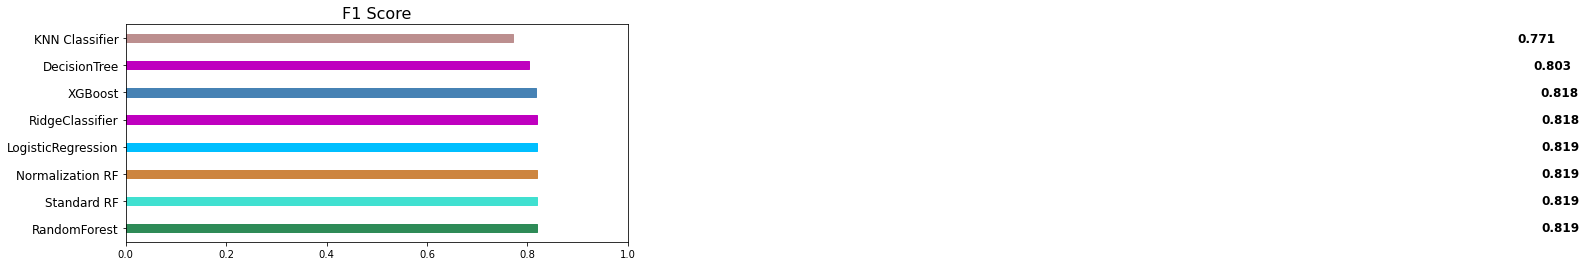

In [10]:
RF_pipeline = make_pipeline(
    #MinMaxScaler(),
    RandomForestClassifier(random_state = 0, max_depth = 5)
)
RF_pipeline.fit(X_train, y_train)
pred = RF_pipeline.predict(X_test)
f1_eval('Normalization RF', pred, y_test)

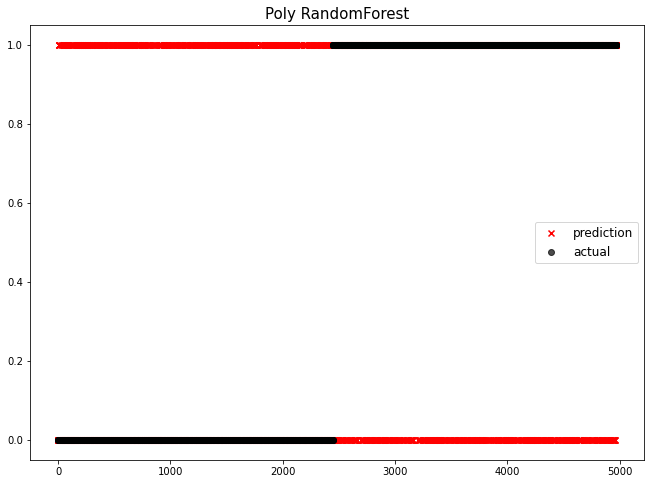

                model        f1
0        RandomForest  0.819491
1         Standard RF  0.819491
2    Normalization RF  0.819491
3  LogisticRegression  0.819392
4     RidgeClassifier  0.818072
5             XGBoost  0.817822
6   Poly RandomForest  0.816135
7        DecisionTree  0.802863
8      KNN Classifier  0.771457


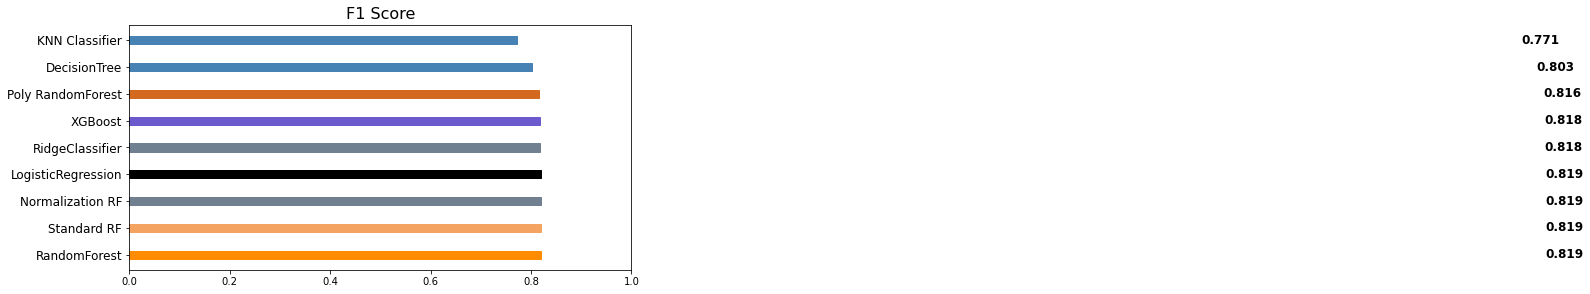

In [11]:
poly_RF_pipeline = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=2, include_bias=False),
    RandomForestClassifier(random_state = 0, max_depth = 5)
)
poly_RF_pipeline.fit(X_train, y_train)
poly_pred = poly_RF_pipeline.predict(X_test)
f1_eval('Poly RandomForest', poly_pred, y_test)

In [12]:
from sklearn.ensemble import VotingClassifier

models = [
    ('Logi', LogisticRegression()), 
    # ('ridge', RidgeClassifier()),
    # ('knn', KNeighborsClassifier()),
    # ('tree', DecisionTreeClassifier()),
    ('ranfore', RandomForestClassifier()),
    ('xgb', XGBClassifier())
]

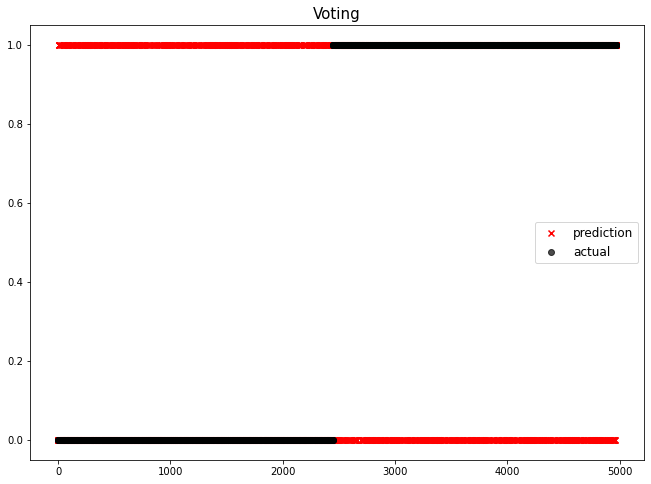

                model        f1
0              Voting  0.824836
1        RandomForest  0.819491
2         Standard RF  0.819491
3    Normalization RF  0.819491
4  LogisticRegression  0.819392
5     RidgeClassifier  0.818072
6             XGBoost  0.817822
7   Poly RandomForest  0.816135
8        DecisionTree  0.802863
9      KNN Classifier  0.771457


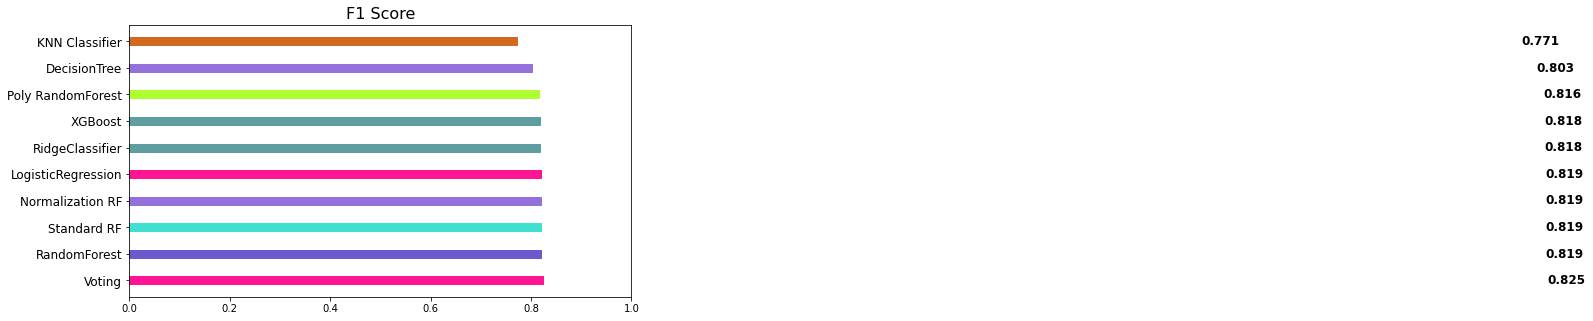

In [13]:
vc = VotingClassifier(models, voting='soft', n_jobs=-1)
vc.fit(X_train, y_train)
pred = vc.predict(X_test)
f1_eval('Voting', pred, y_test)

In [14]:
models = [
    ('Logi', LogisticRegression()), 
    # ('ridge', RidgeClassifier()),
    # ('knn', KNeighborsClassifier()),
    # ('tree', DecisionTreeClassifier()),
    ('ranfore', RF_pipeline),
    ('xgb', XGBClassifier())
]

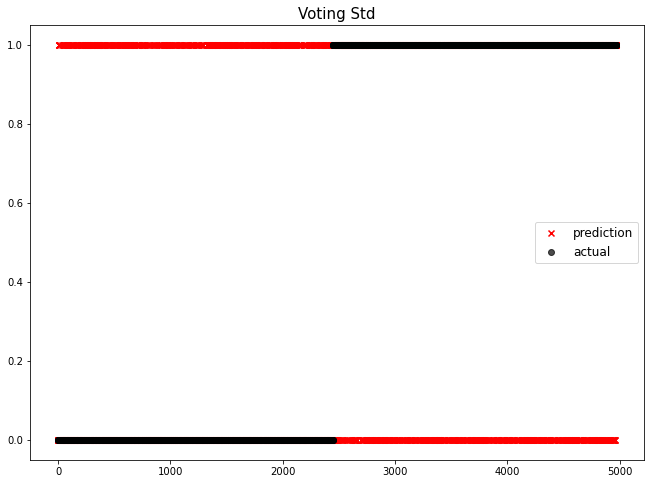

                 model        f1
0               Voting  0.824836
1           Voting Std  0.823483
2         RandomForest  0.819491
3          Standard RF  0.819491
4     Normalization RF  0.819491
5   LogisticRegression  0.819392
6      RidgeClassifier  0.818072
7              XGBoost  0.817822
8    Poly RandomForest  0.816135
9         DecisionTree  0.802863
10      KNN Classifier  0.771457


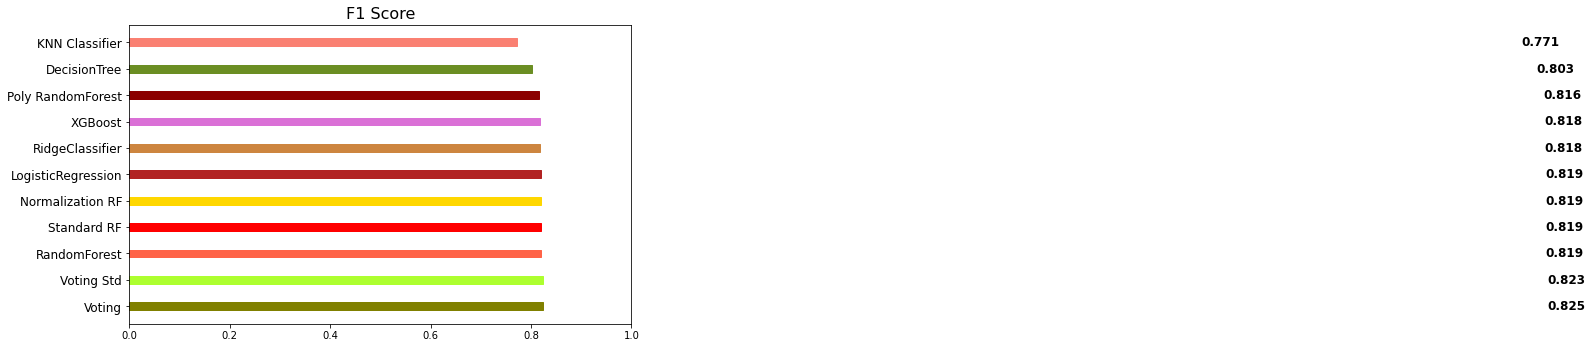

In [15]:
vc = VotingClassifier(models, voting='soft', n_jobs=-1)
vc.fit(X_train, y_train)
pred = vc.predict(X_test)
f1_eval('Voting Std', pred, y_test)

In [16]:
from sklearn.ensemble import StackingClassifier

stack_models = [
    ('randomforest', forest), 
    ('logistic', lg),
]

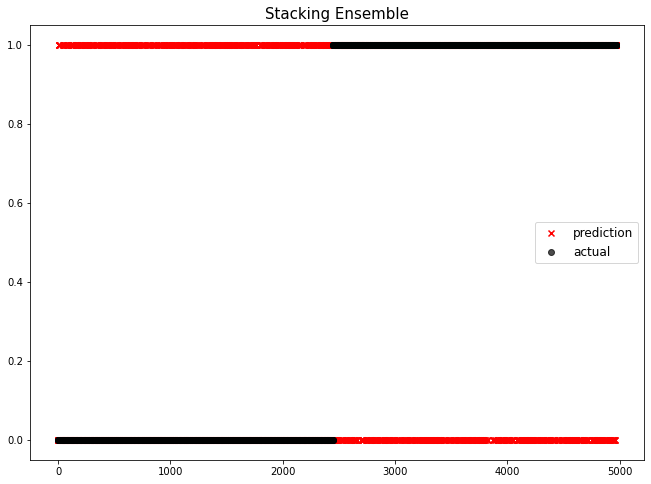

                 model        f1
0               Voting  0.824836
1           Voting Std  0.823483
2    Stacking Ensemble  0.822597
3         RandomForest  0.819491
4          Standard RF  0.819491
5     Normalization RF  0.819491
6   LogisticRegression  0.819392
7      RidgeClassifier  0.818072
8              XGBoost  0.817822
9    Poly RandomForest  0.816135
10        DecisionTree  0.802863
11      KNN Classifier  0.771457


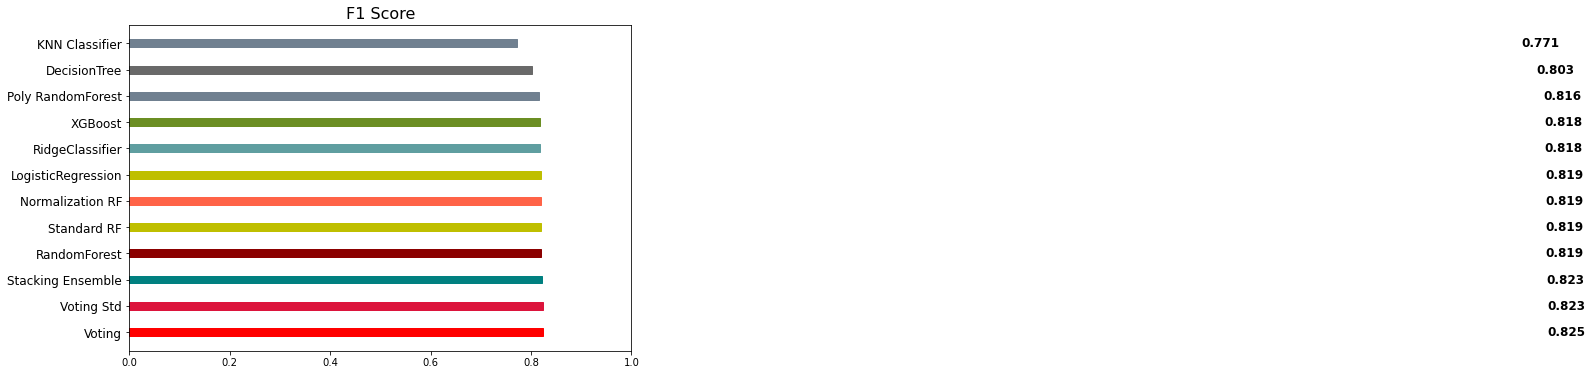

In [17]:
stack_cls = StackingClassifier(stack_models, final_estimator=xgb, n_jobs=-1)

# 샘플 데이터, 알고리즘 3개만 사용했지만 시간이 많이 걸림을 확인 가능
stack_cls.fit(X_train, y_train)
stack_pred = stack_cls.predict(X_test)
f1_eval('Stacking Ensemble', stack_pred, y_test)

#### hyperparameter 튜닝 후

In [142]:
# params = {
#     'n_estimators': [100, 200, 300], 
#     'random_state': [0], 
#     'max_depth': [7, 8, 9, 10], 
#     'max_features': [0.7, 0.8, 0.9], 
#     'min_samples_split': [5, 10, 20],
# }

In [143]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

##### Grid Search RF

In [144]:
# #cv 6 grid search
# grid_search = GridSearchCV(RandomForestClassifier(), params, cv=6, n_jobs=-1, scoring='f1')
# grid_search.fit(X_train,y_train)
# y_pred = grid_search.predict(X_test)
# print(grid_search.best_params_)
# print(grid_search.best_score_)
# print(grid_search.score(X_test,y_test)) #해당것 score
# print(roc_auc_score(y_test,y_pred)) #roc score

In [145]:
# rf_best = RandomForestClassifier(**grid_search.best_params_)
# rf_best.fit(X_train, y_train)
# rf_best_pred = rf_best.predict(X_test)
# f1_eval('GridSearch rf', rf_best_pred, y_test)

In [146]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=6)        # 6개로 나눈다
n_splits = 6

##### XGBclassifier grid search

In [147]:
# params = {
#     'n_estimators': [100, 200, 300], 
#     'random_state': [0], 
#     'learning_rate': [0.01, 0.1], 
#     'max_depth': [5, 6, 7], 
#     'subsample': [0.6, 0.7, 0.8, 0.9],
# }
# #cv 6 grid search
# grid_search = GridSearchCV(XGBClassifier(), params, cv=6, n_jobs=-1, scoring='accuracy')
# grid_search.fit(X_train,y_train)
# y_pred = grid_search.predict(X_test)
# print(grid_search.best_params_)
# print(grid_search.best_score_)
# print(grid_search.score(X_test,y_test)) #해당것 score
# print(roc_auc_score(y_test,y_pred)) #roc score


##### lgbm grid search

In [148]:
from lightgbm import LGBMClassifier

In [149]:
# params = {
#     'n_estimators': [1500, 2000], 
#     'random_state': [0], 
#     'learning_rate': [0.01], 
#     'max_depth': [5, 6, 7], 
#     'subsample': [0.6, 0.7],
#     'colsample_bytree' : [0.8, 0.9]
# }
# #cv 6 grid search
# grid_search = GridSearchCV(XGBClassifier(), params, cv=6, n_jobs=-1, scoring='accuracy')
# grid_search.fit(X_train,y_train)
# y_pred = grid_search.predict(X_test)
# print(grid_search.best_params_)
# print(grid_search.best_score_)
# print(grid_search.score(X_test,y_test)) #해당것 score
# print(roc_auc_score(y_test,y_pred)) #roc score

# lgbm_best = LGBMClassifier(**grid_search.best_params_)
# lgbm_best.fit(X_train, y_train)
# lgbm_best_pred = lgbm_best.predict(X_test)
# f1_eval('GridSearch lgbm', lgbm_best_pred, y_test)

In [150]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

In [151]:
from lightgbm import LGBMClassifier

In [152]:
from sklearn.ensemble import VotingClassifier

In [153]:
rf_best = make_pipeline(
    # StandardScaler(),
    RandomForestClassifier(max_depth=7, max_features= 0.7, min_samples_split= 20,
 n_estimators= 200, random_state= 0),
)

In [154]:
xgb_best = make_pipeline(
    XGBClassifier(learning_rate= 0.01, max_depth= 7, n_estimators= 300,
 random_state= 0, subsample= 0.7),
)


In [155]:
# lgbm_best = make_pipeline(
#     StandardScaler(),
#     LGBMClassifier(colsample_bytree= 0.8, learning_rate= 0.01,
#  max_depth= 5, n_estimators= 1500, random_state= 0,
#  subsample= 0.6),
# )
lgbm_best = LGBMClassifier(colsample_bytree= 0.8, learning_rate= 0.01,
 max_depth= 5, n_estimators= 1500, random_state= 0,
 subsample= 0.6)



In [156]:
knn_best = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(n_neighbors=3),
)

In [157]:
lg_best = make_pipeline(
    # StandardScaler(),
    LogisticRegression(),
)

In [158]:
Ridge_best = make_pipeline(
    # StandardScaler(),
    RidgeClassifier(alpha=3),
)

In [159]:
from sklearn.ensemble import GradientBoostingClassifier

In [160]:
gd_best = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier(learning_rate= 0.1, max_depth= 6, max_features= 0.9,
 n_estimators= 200, random_state= 0, subsample= 0.7),
)

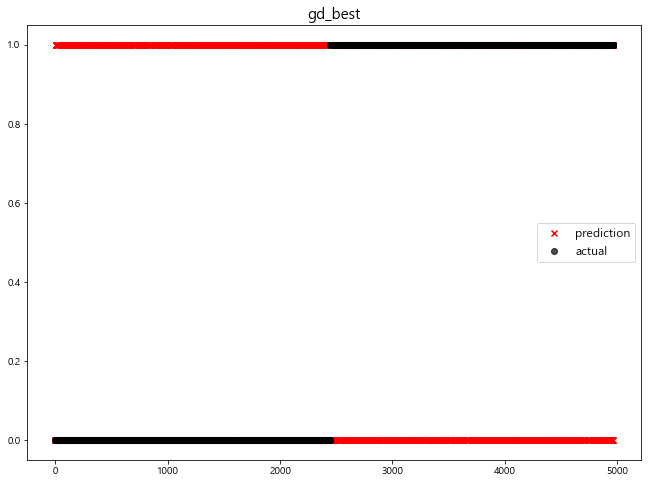

                 model        f1
0               Voting  0.813672
1           Voting Std  0.811328
2              gd_best  0.809339
3              XGBoost  0.805458
4    Stacking Ensemble  0.802166
5      RidgeClassifier  0.799446
6   LogisticRegression  0.799134
7    Poly RandomForest  0.794332
8         RandomForest  0.793657
9     Normalization RF  0.793657
10         Standard RF  0.793503
11        DecisionTree  0.769293
12      KNN Classifier  0.764625


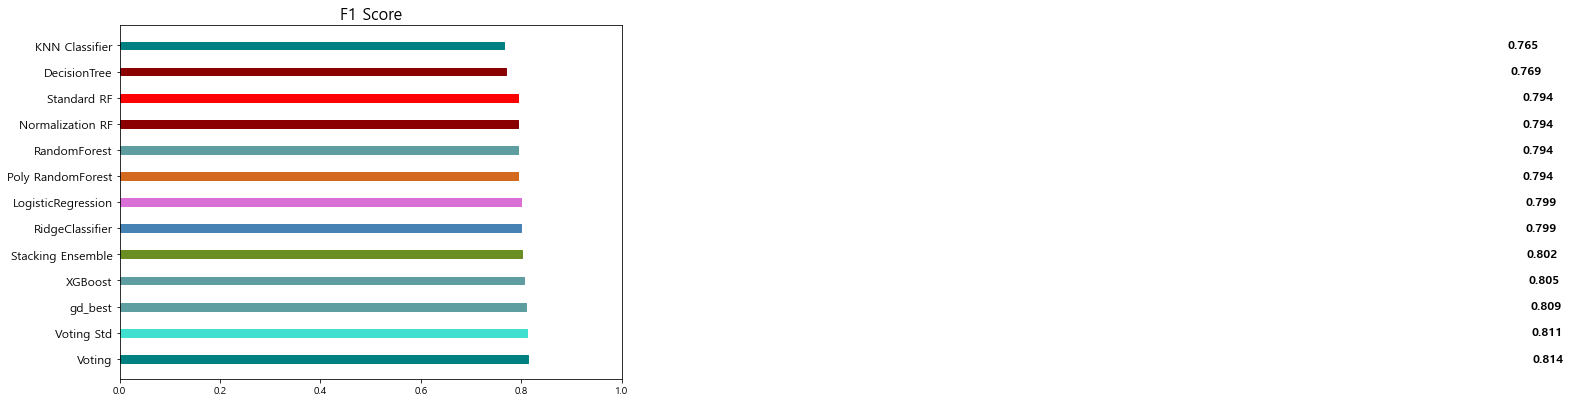

In [161]:
gd_best.fit(X_train, y_train)
gd_best_pred = gd_best.predict(X_test)
f1_eval('gd_best', gd_best_pred, y_test)

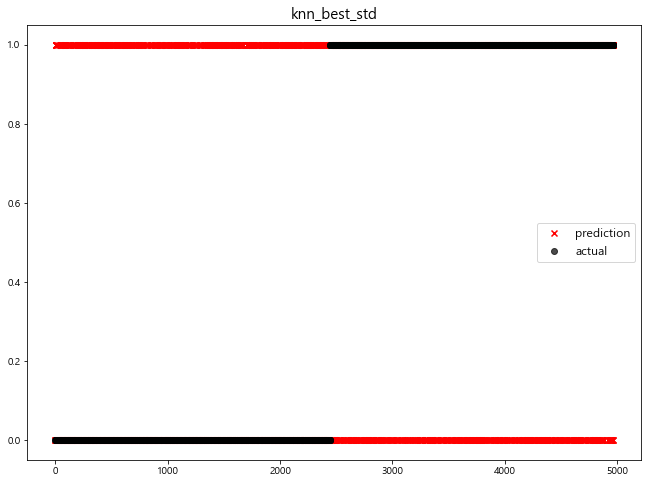

                 model        f1
0               Voting  0.813672
1           Voting Std  0.811328
2         knn_best_std  0.811328
3              gd_best  0.809339
4              XGBoost  0.805458
5    Stacking Ensemble  0.802166
6      RidgeClassifier  0.799446
7   LogisticRegression  0.799134
8    Poly RandomForest  0.794332
9         RandomForest  0.793657
10    Normalization RF  0.793657
11         Standard RF  0.793503
12        DecisionTree  0.769293
13      KNN Classifier  0.764625


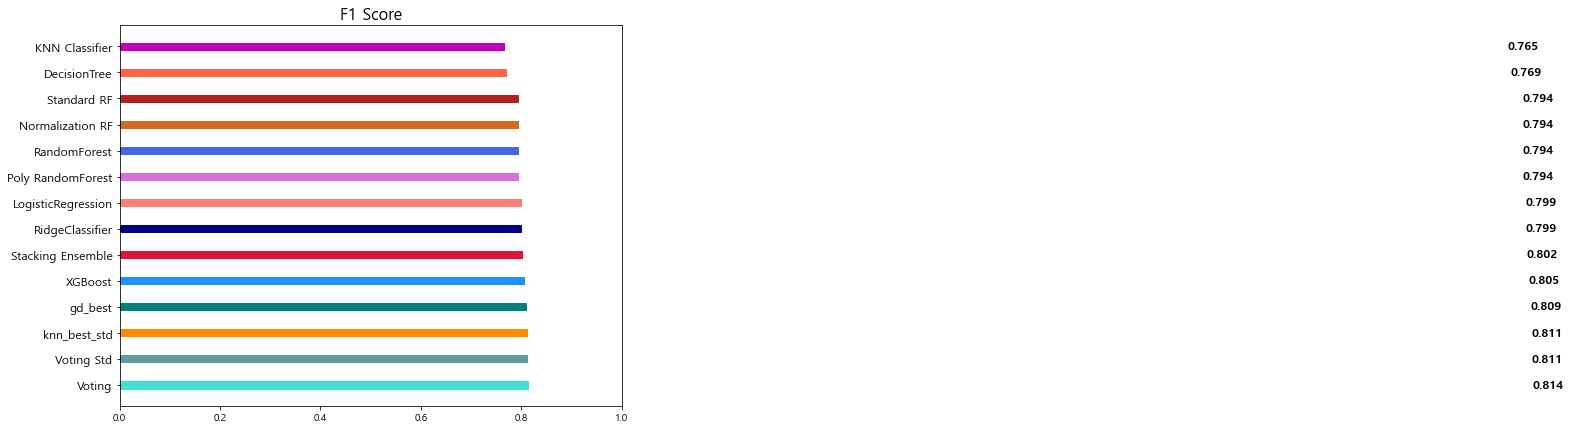

In [162]:
knn_best.fit(X_train, y_train)
knn_best_pred = knn_best.predict(X_test)
f1_eval('knn_best_std', pred, y_test)

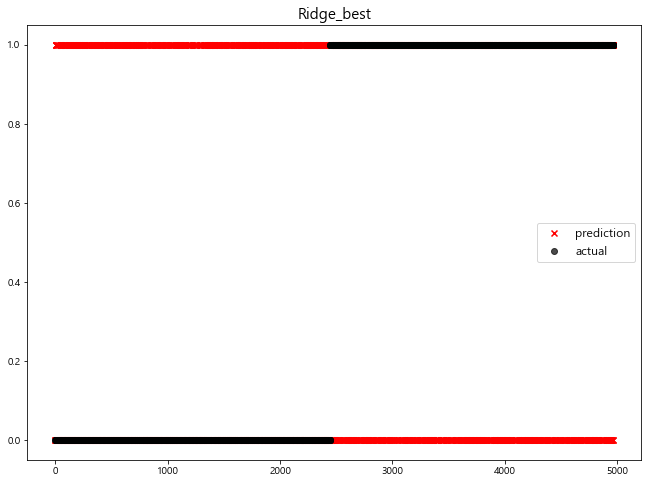

                 model        f1
0               Voting  0.813672
1           Voting Std  0.811328
2         knn_best_std  0.811328
3              gd_best  0.809339
4              XGBoost  0.805458
5    Stacking Ensemble  0.802166
6           Ridge_best  0.800000
7      RidgeClassifier  0.799446
8   LogisticRegression  0.799134
9    Poly RandomForest  0.794332
10        RandomForest  0.793657
11    Normalization RF  0.793657
12         Standard RF  0.793503
13        DecisionTree  0.769293
14      KNN Classifier  0.764625


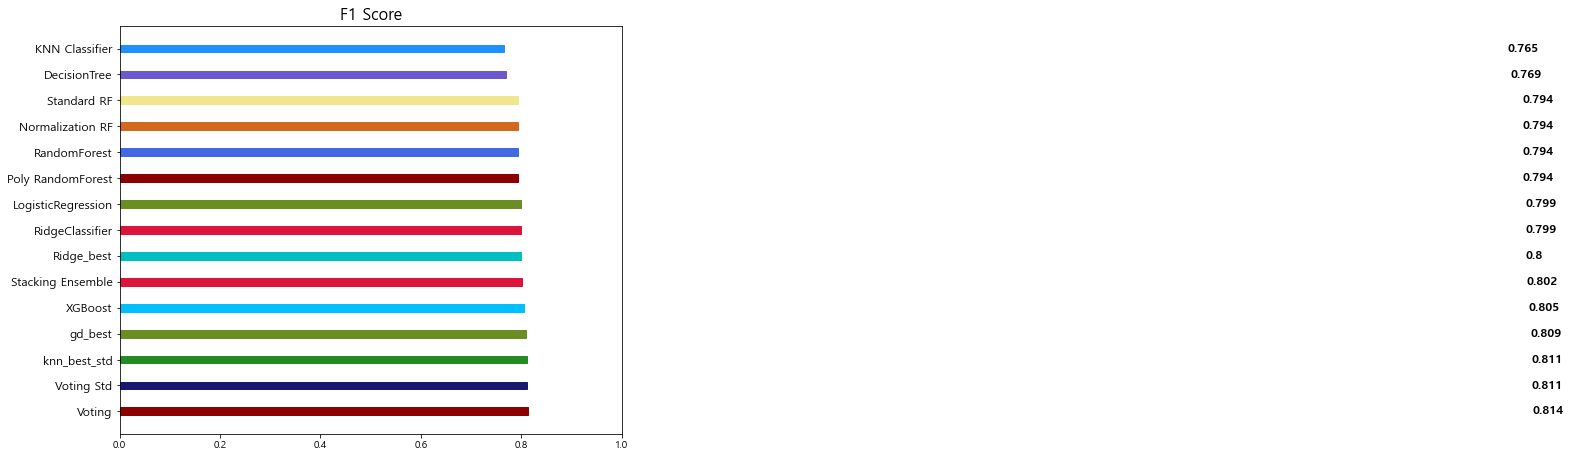

In [163]:
Ridge_best.fit(X_train, y_train)
Ridge_best_pred = Ridge_best.predict(X_test)
f1_eval('Ridge_best', Ridge_best_pred, y_test)

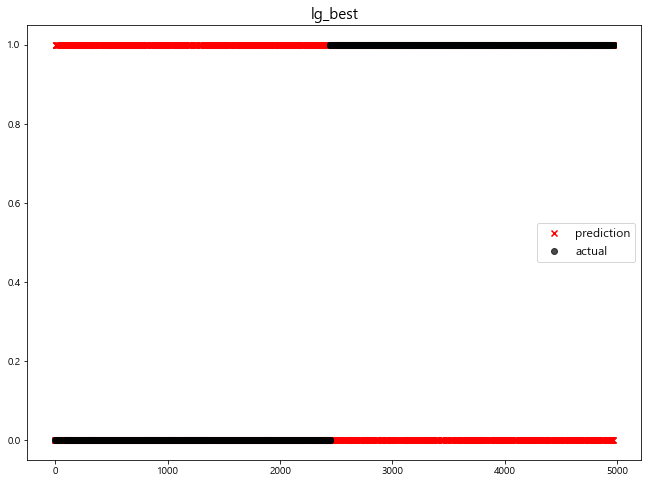

                 model        f1
0               Voting  0.813672
1           Voting Std  0.811328
2         knn_best_std  0.811328
3              gd_best  0.809339
4              XGBoost  0.805458
5    Stacking Ensemble  0.802166
6           Ridge_best  0.800000
7      RidgeClassifier  0.799446
8   LogisticRegression  0.799134
9              lg_best  0.799134
10   Poly RandomForest  0.794332
11        RandomForest  0.793657
12    Normalization RF  0.793657
13         Standard RF  0.793503
14        DecisionTree  0.769293
15      KNN Classifier  0.764625


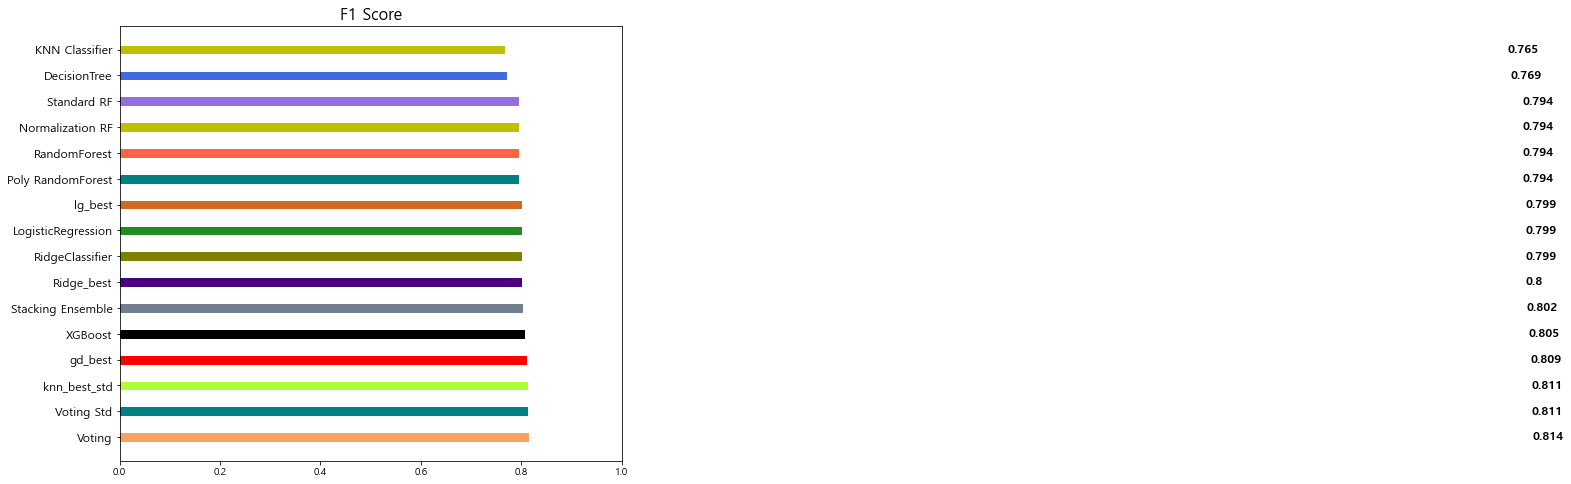

In [164]:
lg_best.fit(X_train, y_train)
lg_best_pred = lg_best.predict(X_test)
f1_eval('lg_best', lg_best_pred, y_test)

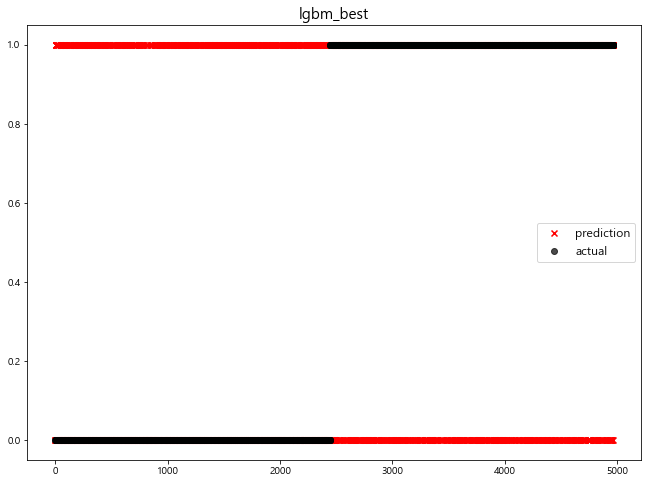

                 model        f1
0               Voting  0.813672
1           Voting Std  0.811328
2         knn_best_std  0.811328
3            lgbm_best  0.811115
4              gd_best  0.809339
5              XGBoost  0.805458
6    Stacking Ensemble  0.802166
7           Ridge_best  0.800000
8      RidgeClassifier  0.799446
9   LogisticRegression  0.799134
10             lg_best  0.799134
11   Poly RandomForest  0.794332
12        RandomForest  0.793657
13    Normalization RF  0.793657
14         Standard RF  0.793503
15        DecisionTree  0.769293
16      KNN Classifier  0.764625


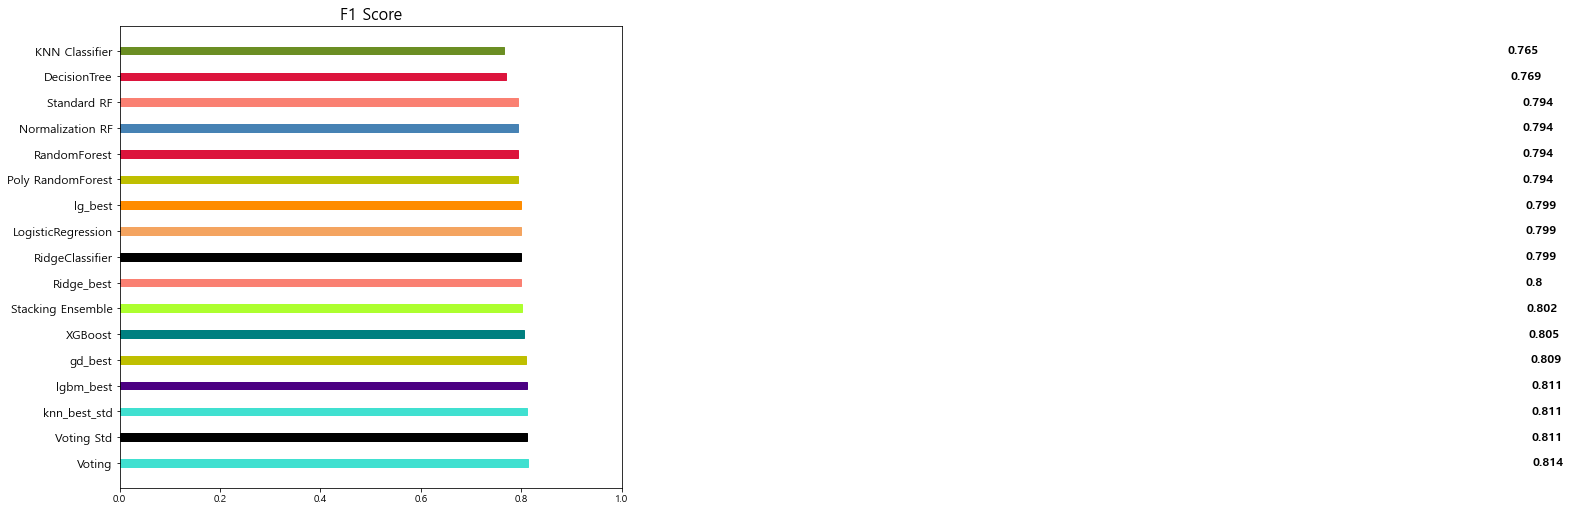

In [165]:
lgbm_best.fit(X_train, y_train)
lgbm_best_pred = lgbm_best.predict(X_test)
f1_eval('lgbm_best', lgbm_best_pred, y_test)

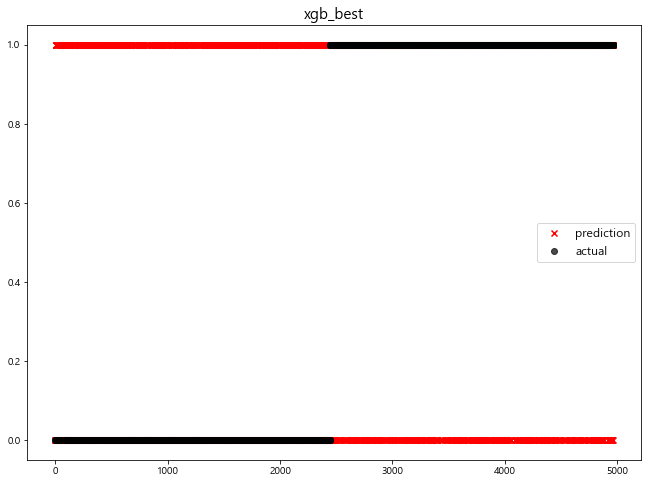

                 model        f1
0               Voting  0.813672
1             xgb_best  0.812416
2           Voting Std  0.811328
3         knn_best_std  0.811328
4            lgbm_best  0.811115
5              gd_best  0.809339
6              XGBoost  0.805458
7    Stacking Ensemble  0.802166
8           Ridge_best  0.800000
9      RidgeClassifier  0.799446
10  LogisticRegression  0.799134
11             lg_best  0.799134
12   Poly RandomForest  0.794332
13        RandomForest  0.793657
14    Normalization RF  0.793657
15         Standard RF  0.793503
16        DecisionTree  0.769293
17      KNN Classifier  0.764625


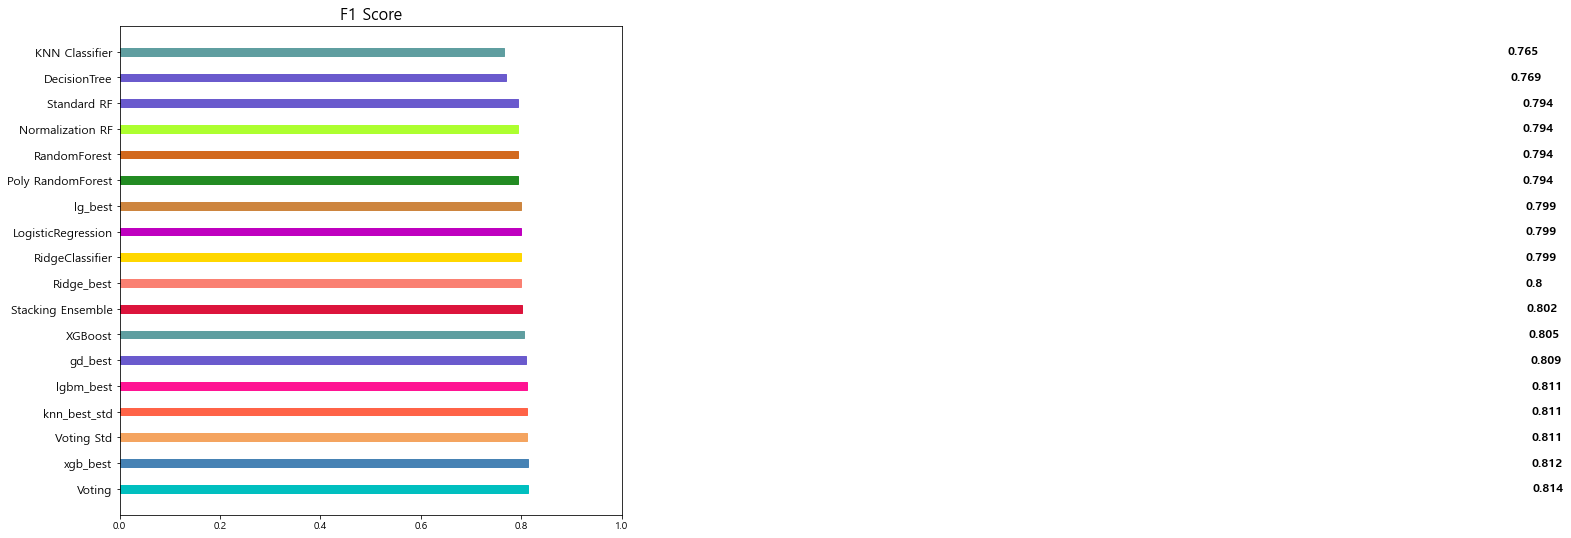

In [166]:
xgb_best.fit(X_train, y_train)
xgb_best_pred = xgb_best.predict(X_test)
f1_eval('xgb_best', xgb_best_pred, y_test)

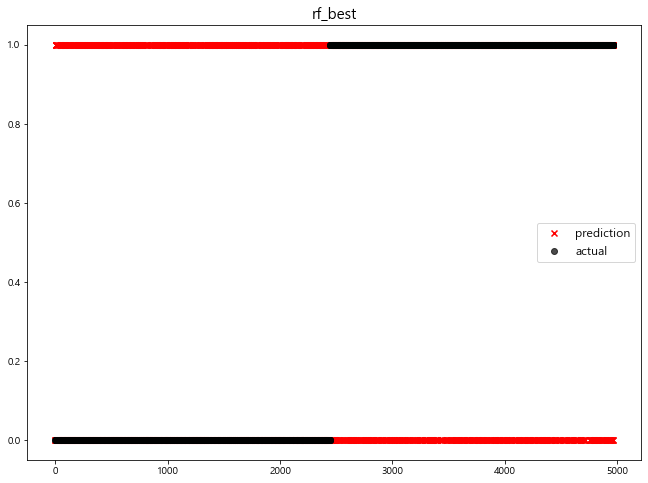

                 model        f1
0               Voting  0.813672
1             xgb_best  0.812416
2           Voting Std  0.811328
3         knn_best_std  0.811328
4            lgbm_best  0.811115
5              gd_best  0.809339
6              rf_best  0.805775
7              XGBoost  0.805458
8    Stacking Ensemble  0.802166
9           Ridge_best  0.800000
10     RidgeClassifier  0.799446
11  LogisticRegression  0.799134
12             lg_best  0.799134
13   Poly RandomForest  0.794332
14        RandomForest  0.793657
15    Normalization RF  0.793657
16         Standard RF  0.793503
17        DecisionTree  0.769293
18      KNN Classifier  0.764625


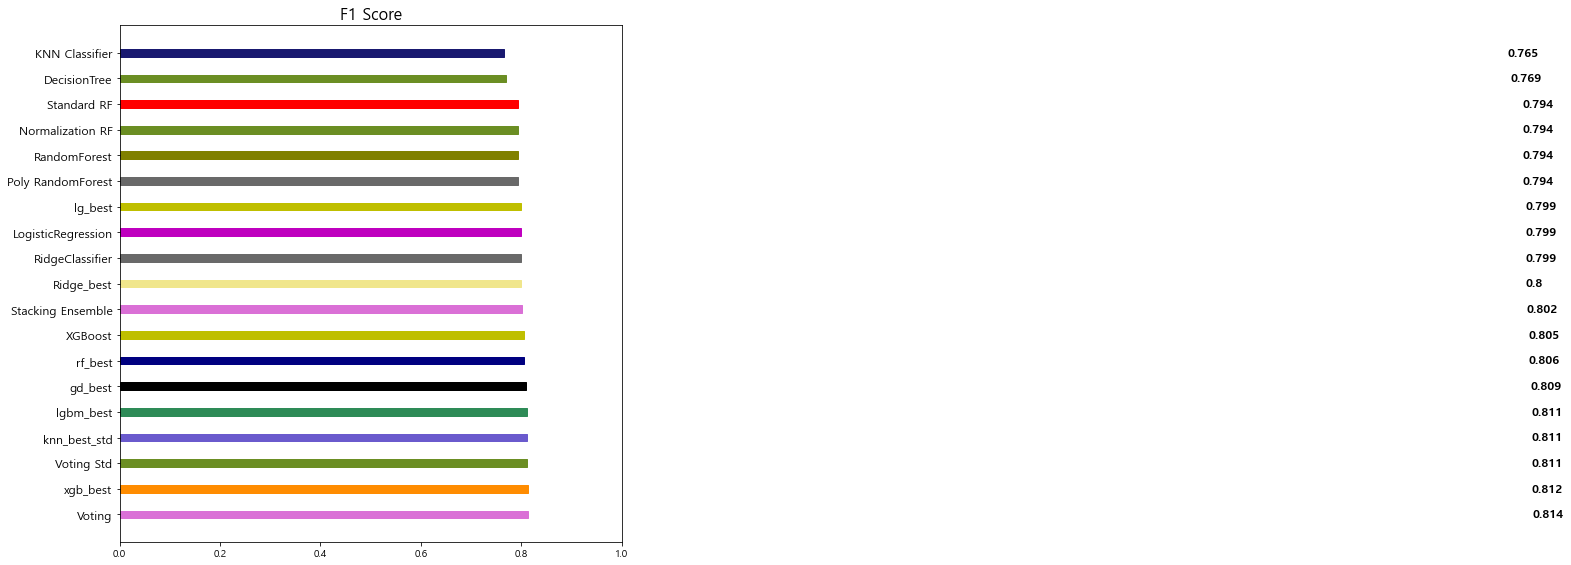

In [167]:
rf_best.fit(X_train, y_train)
rf_best_pred = rf_best.predict(X_test)
f1_eval('rf_best', rf_best_pred, y_test)

In [168]:
models = [
    # ('Logi', lg_best), 
    # ('ridge', Ridge_best),
    ('knn', knn_best),
    # ('rf', rf_best),
    ('lgbm', lgbm_best),
    ('xgb', xgb_best),
    ('gradient', gd_best)
]

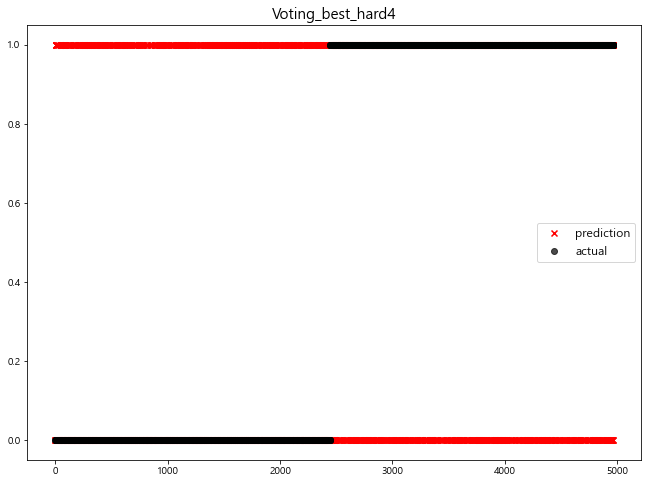

                 model        f1
0               Voting  0.813672
1             xgb_best  0.812416
2           Voting Std  0.811328
3         knn_best_std  0.811328
4            lgbm_best  0.811115
5              gd_best  0.809339
6    Voting_best_hard4  0.808519
7              rf_best  0.805775
8              XGBoost  0.805458
9    Stacking Ensemble  0.802166
10          Ridge_best  0.800000
11     RidgeClassifier  0.799446
12  LogisticRegression  0.799134
13             lg_best  0.799134
14   Poly RandomForest  0.794332
15        RandomForest  0.793657
16    Normalization RF  0.793657
17         Standard RF  0.793503
18        DecisionTree  0.769293
19      KNN Classifier  0.764625


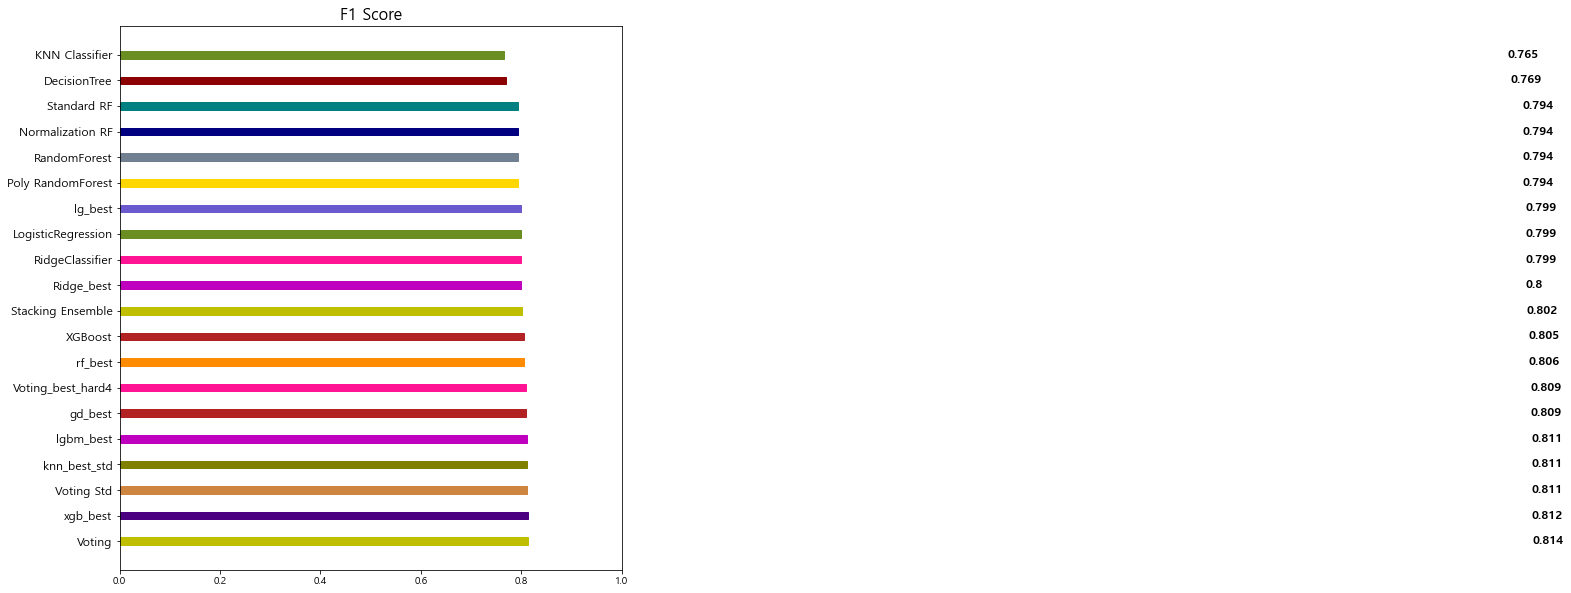

In [169]:
vc = VotingClassifier(models, voting='hard', n_jobs=-1)
vc.fit(X_train, y_train)
pred = vc.predict(X_test)
f1_eval('Voting_best_hard4', pred, y_test)

### **Stacking 결과**

In [170]:
from sklearn.ensemble import StackingClassifier

stack_models = [
    ('lgbm_std', lgbm_best), 
    ('knn_std', knn_best),
    # ('rf_bset', rf_best),
    ('Ridge', Ridge_best)
]

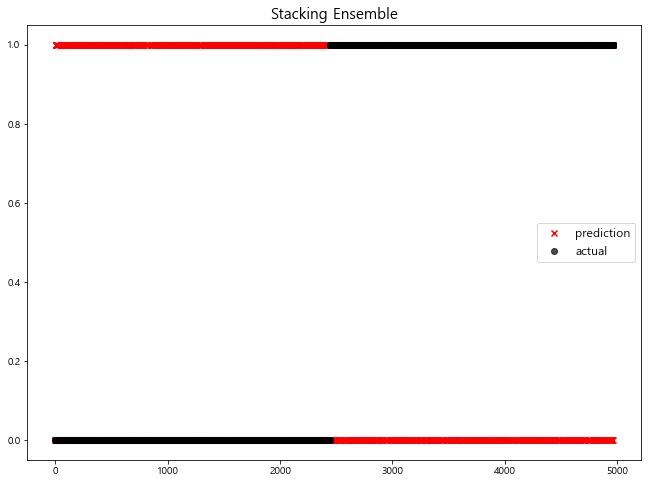

                 model        f1
0               Voting  0.813672
1    Stacking Ensemble  0.812463
2             xgb_best  0.812416
3           Voting Std  0.811328
4         knn_best_std  0.811328
5            lgbm_best  0.811115
6              gd_best  0.809339
7    Voting_best_hard4  0.808519
8              rf_best  0.805775
9              XGBoost  0.805458
10          Ridge_best  0.800000
11     RidgeClassifier  0.799446
12  LogisticRegression  0.799134
13             lg_best  0.799134
14   Poly RandomForest  0.794332
15        RandomForest  0.793657
16    Normalization RF  0.793657
17         Standard RF  0.793503
18        DecisionTree  0.769293
19      KNN Classifier  0.764625


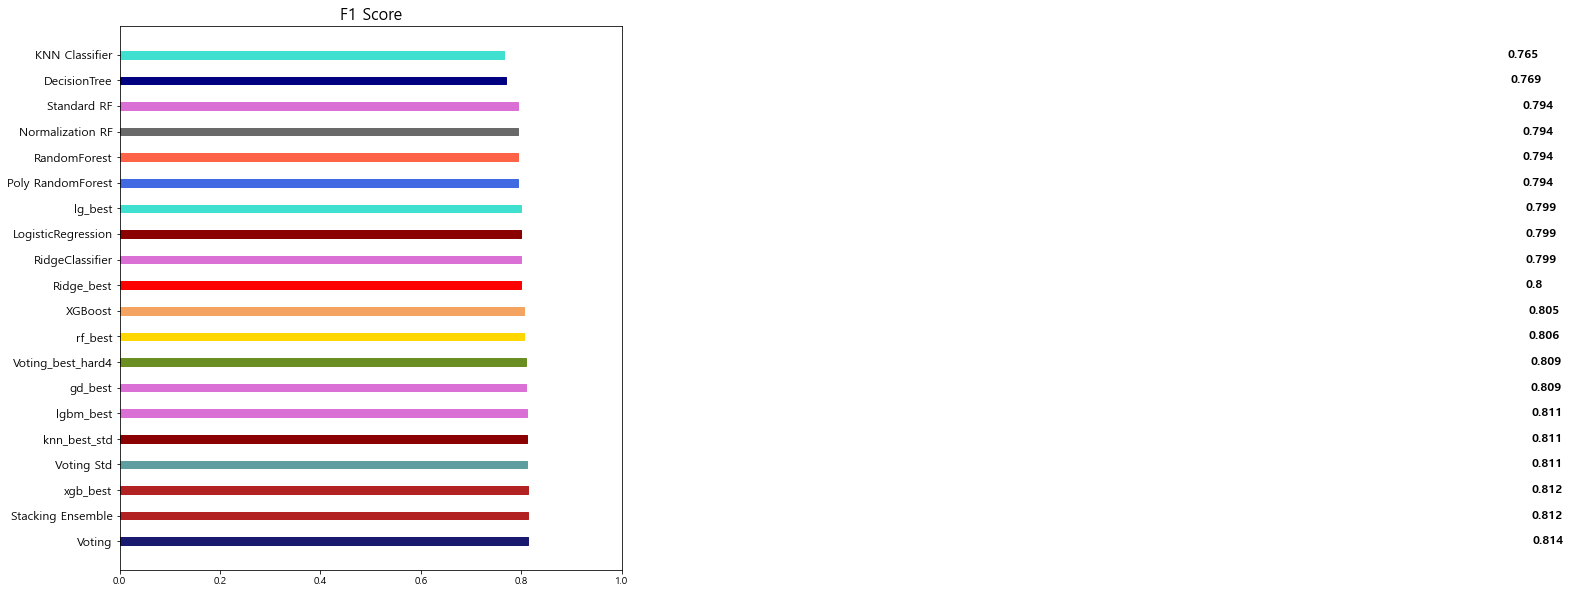

In [171]:
stack_cls = StackingClassifier(stack_models, final_estimator=xgb_best, n_jobs=-1)

# 알고리즘 3개만 사용
stack_cls.fit(X_train, y_train)
stack_pred = stack_cls.predict(X_test)
f1_eval('Stacking Ensemble', stack_pred, y_test)

In [172]:
final_outputs = {
    'xgb_best': xgb_best_pred, 
    'lgbm_std': lgbm_best_pred, 
    'knn_std': knn_best_pred,
    'rf_best': rf_best_pred, 
    'Ridge': Ridge_best_pred,
    'gdb': gd_best_pred,
}

In [173]:
final_prediction=\
final_outputs['Ridge'] * 0.1\
+final_outputs['knn_std'] * 0.2\
+final_outputs['lgbm_std'] * 0.2\
+final_outputs['xgb_best'] * 0.25\
+final_outputs['rf_best'] * 0.15\
+final_outputs['gdb'] * 0.1

In [174]:
# Confusion Matrix로 보여주기
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from IPython.display import Image

my_predictions = {}
my_pred = None
my_actual = None
my_name = None

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(11, 8))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    
plt.show
()

def plot_confusionmatrix(name_, actual,pred):
    cm = confusion_matrix(actual, pred)
    cm = pd.DataFrame(cm, columns=['Lose','Win'], index=['Lose','Win'])# columns=['Lose','Win'], index=['Lose','Win']
    plt.figure(figsize=(11,8))
    sns.heatmap(cm, annot=True, annot_kws={'size':20}, cmap='YlOrBr')
    plt.xlabel('Predict', fontsize=20)
    plt.ylabel('Actual', fontsize=20)
    
    plt.show()
    print(cm)

def f1_eval(name_, pred, actual):

    global my_predictions, colors, my_pred, my_actual, my_name
    
    my_name = name_
    my_pred = pred
    my_actual = actual
    plot_confusionmatrix(name_, pred, actual)
#    plot_predictions(name_, pred, actual)

    f1 = f1_score(actual, pred)
    my_predictions[name_] = f1

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'f1'])
    print(df)
    min_ = 0
    max_ = 1
    
    length = len(df) / 2



    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['f1'], height=0.3)
    
    for i, v in enumerate(df['f1']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('F1 Score', fontsize=16)
    plt.xlim(min_, max_)
    
    
plt.show
()
    
def add_model(name_, pred, actual):
    global my_predictions, my_pred, my_actual, my_name
    my_name = name_
    my_pred = pred
    my_actual = actual
    
    f1 = f1_score(actual, pred)
    my_predictions[name_] = f1

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

def plot_all():
    global my_predictions, my_pred, my_actual, my_name
    
    plot_predictions(my_name, my_pred, my_actual)
    
    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'f1'])
    print(df)
    min_ = 0
    max_ = 1
    
    length = len(df) / 2
    
    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['f1'], height=0.3)
    
    for i, v in enumerate(df['f1']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('F1 Score', fontsize=16)
    plt.xlim(min_, max_)
    
    
plt.show
() 

()

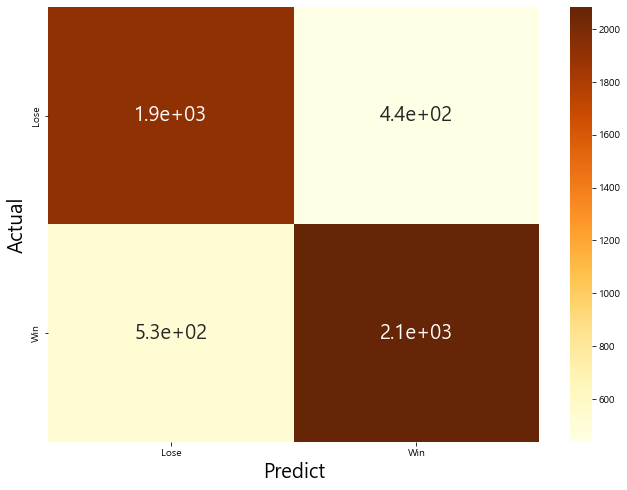

      Lose   Win
Lose  1912   439
Win    534  2083
               model        f1
0  Weighted Blending  0.810664


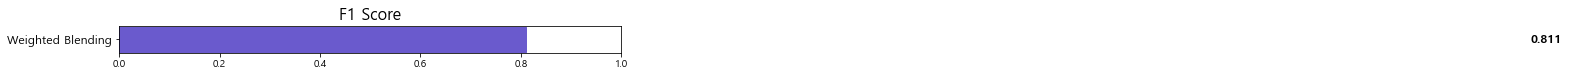

In [175]:
# Weighted Blending score
f1_eval('Weighted Blending', (final_prediction>0.5)+0, y_test)

In [18]:
import shap
import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm 
        #fm._rebuild() 
        plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
#matplotlib 패키지 한글 깨짐 처리 끝

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


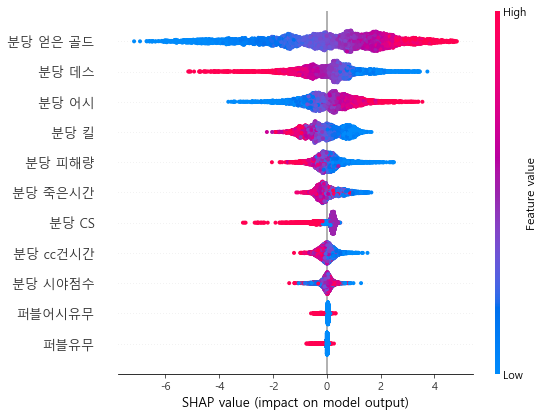

In [21]:
shap.initjs()
explainer = shap.TreeExplainer(xgb)
#explainer = shap.TreeExplainer(knn_best)
shap_values = explainer.shap_values(X_test)
fig = shap.summary_plot(shap_values, X_test)
#plt.savefig(f'{data}/shap.png', dpi=300, bbox_inches="tight")

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


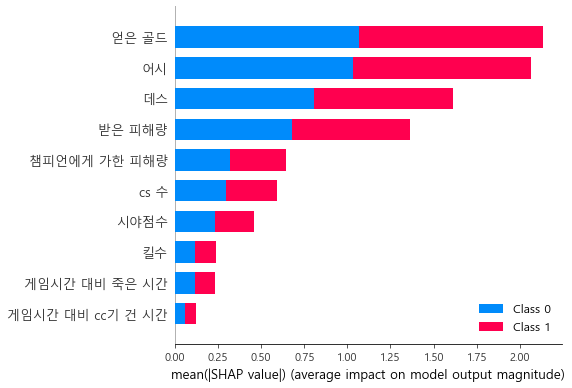

In [178]:
shap.initjs()
explainer = shap.TreeExplainer(lgbm_best)
#explainer = shap.TreeExplainer(knn_best)
shap_values = explainer.shap_values(X_test)
fig = shap.summary_plot(shap_values, X_test)
#plt.savefig(f'{data}/shap.png', dpi=300, bbox_inches="tight")